In [1]:
######## Calling libraries and database ########

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import altair as alt


agent_df = pd.read_csv ('data/king_county_joined.csv')

In [3]:
######## EXPLORING DATA ########

In [4]:
agent_df.head (10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,NaN,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,NaN,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


In [5]:
agent_df.tail(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21587,7852140040,3.0,2.50,2270.0,5536.0,2.0,NaN,0.0,3,8,...,0.0,2003,0.0,98065,47.5389,-121.881,2270.0,5731.0,2014-08-25,507250.0
21588,9834201367,3.0,2.00,1490.0,1126.0,3.0,0.0,0.0,3,8,...,0.0,2014,0.0,98144,47.5699,-122.288,1400.0,1230.0,2015-01-26,429000.0
21589,3448900210,4.0,2.50,2520.0,6023.0,2.0,0.0,NaN,3,9,...,0.0,2014,0.0,98056,47.5137,-122.167,2520.0,6023.0,2014-10-14,610685.0
21590,7936000429,4.0,3.50,3510.0,7200.0,2.0,0.0,0.0,3,9,...,910.0,2009,0.0,98136,47.5537,-122.398,2050.0,6200.0,2015-03-26,1010000.0
21591,2997800021,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,3,8,...,130.0,2008,0.0,98116,47.5773,-122.409,1330.0,1265.0,2015-02-19,475000.0
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


In [6]:
df.info()
# Findings: 1. 4 columns with NaN: waterfront, view, sqft_basement, yr_renovated. 2. Date needs fixing, 3. floors should be int64

NameError: name 'df' is not defined

In [ ]:
######## COLUMN VALUES ########

In [ ]:
#counting unique column combinations
agent_df[['id',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15',
    'date',
    'price'
]].value_counts()


id          bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15  date        price   
1200021     3.0       1.00       1460.0       43000.0   1.0     0.0         0.0   3          7      1460.0      0.0            1952      0.0           98166    47.4434  -122.347  2250.0         20023.0     2014-08-11  400000.0    1
6411600411  2.0       1.00       770.0        7200.0    1.0     0.0         0.0   3          7      770.0       0.0            1951      0.0           98125    47.7143  -122.325  1320.0         7139.0      2014-12-09  257000.0    1
6372000297  3.0       3.50       1660.0       2298.0    2.0     0.0         0.0   3          8      1260.0      400.0          2009      0.0           98116    47.5809  -122.403  1500.0         2198.0      2015-03-23  608000.0    1
6373000130  4.0       2.25       1720.0       2300.0    1.0     0.0         0

In [ ]:
# viewing unique values for view
agent_df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [ ]:
# viewing unique values for view
agent_df['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7.,  8.,  9., 11., 10., 33.])

In [ ]:
# viewing unique values for view
agent_df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [ ]:
# viewing and counting unique values for year built
agent_df['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [ ]:
# viewing and counting unique values for year renovated
agent_df['yr_renovated'].unique()


array([    0., 19910., 20020., 20100., 19920., 20130., 19940., 19780.,
       20050., 20030., 19840., 19540., 20140., 20110., 19830., 19450.,
       19900., 19880., 19770., 19810., 19950., 20000., 19990., 19980.,
       19700., 19890., 20040., 19860., 20070., 19870., 20060., 19850.,
       20010., 19800., 19710., 19790., 19970., 19500., 19690., 19480.,
       20090., 20150., 19740., 20080., 19680., 20120., 19630., 19510.,
       19620., 19530., 19930., 19960., 19550., 19820., 19560., 19400.,
       19760., 19460., 19750., 19640., 19730., 19570., 19590., 19600.,
       19670., 19650., 19340., 19720., 19440., 19580.])

In [ ]:
# convert bedrooms from float to int
agent_df['bedrooms'] = agent_df['bedrooms'].astype(int)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
# viewing and counting unique values for year built
agent_df['price'].unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.],
      shape=(3622,))

In [ ]:
# Check how many houses were built in 1900 (initially suspicious but normal: 87)
agent_df['yr_built'].value_counts().loc[1900]

np.int64(87)

In [ ]:
# viewing unique values for view
agent_df['floors'].unique()

In [ ]:
# counting options of number of bathrooms
print(agent_df['bathrooms'].value_counts())


bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: count, dtype: int64


In [ ]:
# counting missing (NaN) values per column
agent_df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

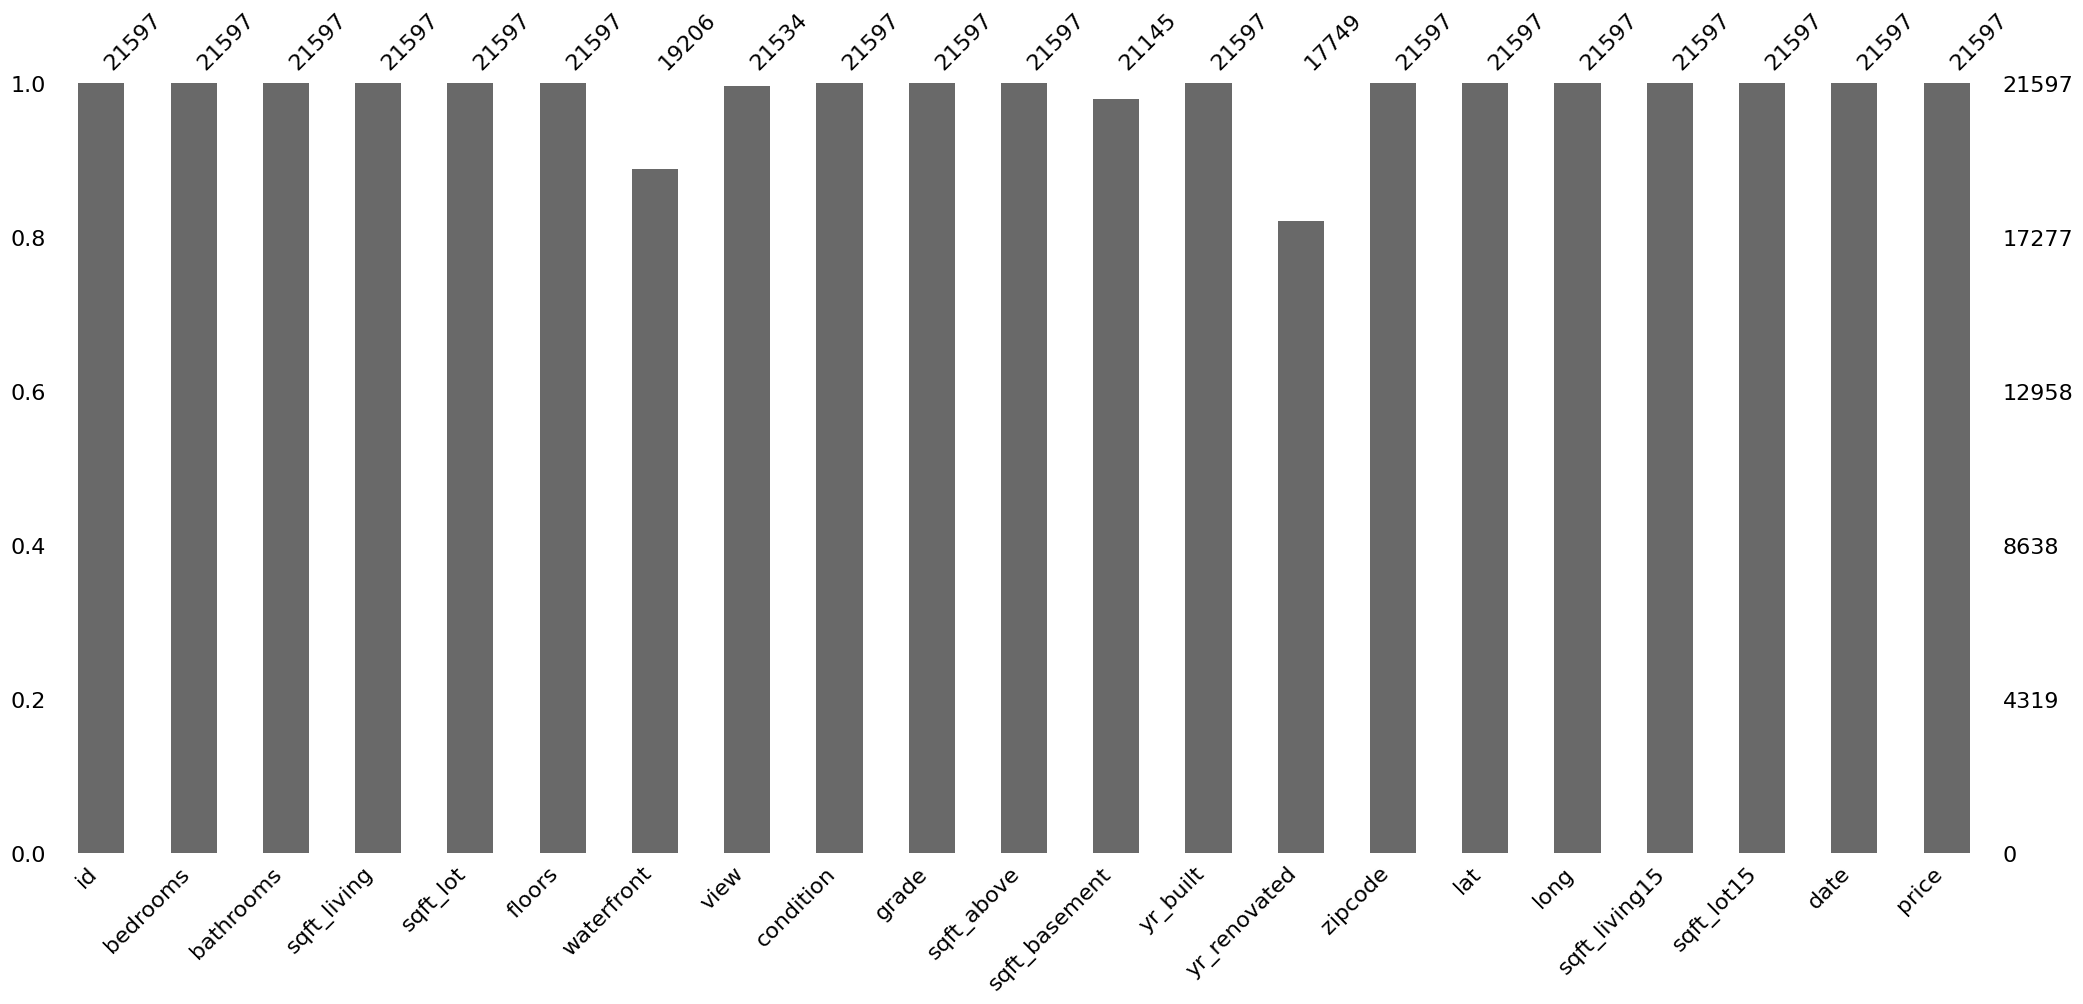

In [ ]:
# overview of missing values
msno.bar(agent_df)

In [ ]:
# counting duplicates #
agent_df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [ ]:
# counting missing #
agent_df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [ ]:
# Filter houses with more than 10 bedrooms
agent_df[agent_df['bedrooms'] > 10]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
8748,1773100755,11,3.00,3000.0,4960.0,2.0,0.0,0.0,3,7,...,600.0,1918,19990.0,98106,47.5560,-122.363,1420.0,4960.0,2014-08-21,520000.0
15856,2402100895,33,1.75,1620.0,6000.0,1.0,0.0,0.0,5,7,...,580.0,1947,0.0,98103,47.6878,-122.331,1330.0,4700.0,2014-06-25,640000.0


In [ ]:
######## CLEANING ########

In [ ]:
######## assuming missing as "none"  ########
agent_df['waterfront'] = agent_df['waterfront'].fillna(0)
agent_df['view'] = agent_df['view'].fillna(0)
agent_df['sqft_basement'] = agent_df['sqft_basement'].fillna(0)
agent_df['yr_renovated'] = agent_df['yr_renovated'].fillna(0)

agent_df.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

In [ ]:

agent_df['view'].value_counts(dropna=False)

view
0       19422
2         957
3         508
1         330
4         317
<NA>       63
Name: count, dtype: Int64

In [ ]:
# fixing date data type
agent_df['date'] = pd.to_datetime(agent_df['date'])
agent_df.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0
6,1321400060,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3,7,...,0.0,1995,0.0,98003,47.3097,-122.327,2238.0,6819.0,2014-06-27,257500.0
7,2008000270,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3,7,...,0.0,1963,0.0,98198,47.4095,-122.315,1650.0,9711.0,2015-01-15,291850.0
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,730.0,1960,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0
9,3793500160,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3,7,...,0.0,2003,0.0,98038,47.3684,-122.031,2390.0,7570.0,2015-03-12,323000.0


In [ ]:
#with numpy, leave integral as it is, if not take, keep baseline and add .5, making all float numbers as .5
agent_df['bathrooms'] = agent_df['bathrooms'].apply(
    lambda x: x if x.is_integer() else np.floor(x) + 0.5
)
#viewing updated of number of bathrooms
print(agent_df['bathrooms'].value_counts())

bathrooms
2.5    8609
1.5    4502
1.0    3851
2.0    1930
3.5    1475
3.0     753
4.5     202
4.0     136
0.5      75
5.5      27
5.0      21
6.0       6
6.5       6
8.0       2
7.5       2
Name: count, dtype: int64


In [ ]:
#format bedrooms to int type instead of float
agent_df['bedrooms'] = agent_df['bedrooms'].astype(int)
agent_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.0,1180.0,5650.0,1.0,0.0,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3,2.5,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2,1.0,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,0.0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4,3.0,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3,2.0,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [ ]:
#format floors to int type instead of float
agent_df['bedrooms'] = agent_df['bedrooms'].astype(int)
agent_df.head()

In [ ]:
#locating index for outliner
agent_df[agent_df['bedrooms'] == 33]


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
15856,2402100895,33,1.5,1620.0,6000.0,1.0,0.0,0.0,5,7,...,580.0,1947,0.0,98103,47.6878,-122.331,1330.0,4700.0,2014-06-25,640000.0


In [ ]:
#dropping outliner case with 33 bedrooms
agent_df = agent_df.drop(index=15856)

In [ ]:
#removing extra cero, and changing float to int

# dividing by 10 to remove extra cero
agent_df['yr_renovated'] = (agent_df['yr_renovated'] / 10).round()

# replace cero with NA
agent_df['yr_renovated'] = agent_df['yr_renovated'].fillna(0)

# changing float to int format
agent_df['yr_renovated'] = agent_df['yr_renovated'].astype(int)


agent_df['yr_renovated'].unique()
#agent_df.head()


array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

In [ ]:
# changing float to int in view column, but with 'Int64'
agent_df['view'] = agent_df['view'].astype('Int64')
agent_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0,3,7,...,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3,7,...,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0,3,6,...,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5,7,...,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3,8,...,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


In [ ]:
######## EXPLORING PLOTS ########

In [ ]:
######## H1 : PRICE VS CONDITION ########

In [ ]:
import plotly.express as px

fig = px.scatter(
    agent_df,
    x='condition',
    y='price',
    color='condition',
    opacity=0.6,
    labels={'condition': 'Condition', 'price': 'Price'},
    title='House Price vs Condition'
)

fig.update_layout(
    yaxis_tickformat='$,.0f',
    xaxis_tickmode='array',
    xaxis_tickvals=[1, 2, 3, 4, 5]
)

fig.show()


In [ ]:
import plotly.express as px

# creating an extra column in millions
agent_df['price_millions'] = agent_df['price'] / 1_000_000

fig = px.scatter(
    agent_df,
    x='condition',
    y='price_millions',
    color='condition',
    opacity=0.6,
    labels={
        'condition': 'Condition',
        'price_millions': 'Price (Millions)'
    },
    title='House Price vs Condition',
    height=600,
    width=800
)

# fontsize
fig.update_layout(
    font=dict(size=20),
    title_font=dict(size=20),
    xaxis_tickmode='array',
    xaxis_tickvals=[1, 2, 3, 4, 5],
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16)
)

# format
fig.update_yaxes(
    tickformat=".0f",
    tickprefix="$"
)

fig.show()


In [ ]:
# validating H1 correlation: none
agent_df['condition'].corr(agent_df['price'])


np.float64(0.036056375486095055)

In [ ]:
# view unique values for 'condition' column
agent_df['condition'].unique()

array([3, 5, 4, 1, 2])

In [ ]:
######## H2 : PRICE VS SUBURBS ########

In [ ]:
# calculate and sort average house prices by zip code

agent_df.groupby('zipcode')['price'].mean().sort_values()

zipcode
98002    2.342840e+05
98168    2.403284e+05
98032    2.512962e+05
98001    2.811949e+05
98148    2.849086e+05
             ...     
98102    8.996077e+05
98112    1.096239e+06
98040    1.194874e+06
98004    1.356524e+06
98039    2.161300e+06
Name: price, Length: 70, dtype: float64

In [ ]:
#geografical plot
fig = px.scatter_mapbox(
    agent_df,
    lat='lat',
    lon='long',
    size='price',
    color='price',
    color_continuous_scale=[
        [0.0, 'lightblue'],
        [0.5, 'deepskyblue'],
        [1.0, 'orangered']
    ],
    size_max=20,
    zoom=12,
    center={"lat":47.61, "lon":-122.33},
    mapbox_style='carto-positron',
    hover_name='zipcode',
    title='Seattle Area: House Prices — Downtown vs Suburbs',
    opacity=0.7
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Price",
        tickprefix="$"
    )
)

fig.show()


/var/folders/0f/l879681d4qjd46vwl7dnct5h0000gn/T/ipykernel_20585/3125301172.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [ ]:
#creating column for correlation
suburbs = [98004, 98005, 98006, 98007, 98039, 98040, 98033, 98034, 98052, 98053]
agent_df['is_suburb'] = agent_df['zipcode'].isin(suburbs).astype(int)
agent_df.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,price_millions,is_suburb
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0,3,7,...,0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,0.2219,0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0,3,7,...,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,0.5380,0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0,3,6,...,0,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,0.1800,0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0,5,7,...,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,0.6040,0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0,3,8,...,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,0.5100,0


In [ ]:
# validating H2 correlation, it was somewhat true
agent_df['is_suburb'].corr(agent_df['price'])


np.float64(0.3314882922705403)

In [ ]:
######## H3 : PRICE VS bathrooms ########

In [ ]:
#scatter plot to validate H3
agent_df['price_millions'] = agent_df['price'] / 1_000_000

fig = px.scatter(
    agent_df,
    x='bathrooms',
    y='price_millions',
    color='bathrooms',
    opacity=0.6,
    labels={
        'bathrooms': 'Bathrooms',
        'price_millions': 'Price (Millions)'
    },
    title='House Price vs Number of Bathrooms',
    height=600,
    width=800
)

# fonts and format
fig.update_layout(
    font=dict(size=20),
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16)
)

fig.update_yaxes(
    tickformat=".1f",
    tickprefix="$"
)

fig.show()


In [ ]:
# validating correlation
agent_df['bathrooms'].corr(agent_df['price'])

np.float64(0.5259056214532013)

In [ ]:
######## GETTING RECOMMENDATIONS READY ########

In [ ]:
# grouping zip codes, getting mean prices
zip_prices = agent_df.groupby('zipcode')['price'].mean().reset_index()

In [ ]:
# sorting zip codes by price
zip_prices = zip_prices.sort_values('price')

In [ ]:
# get lower quartile, median, and upper quartile of prices
agent_df['price'].quantile([0.25, 0.5, 0.75])

0.25    322000.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64

In [ ]:
# pie chart for quartile overview
fig.update_layout(
    title={
        'text': 'Prices in Middle-High Neighborhoods',
        'x': 0.5,               
        'xanchor': 'center'
    },
    font=dict(size=16),
    title_font=dict(size=20),
    legend=dict(
        x=0.85,                # moves lables closer to chart
        y=0.5,
        xanchor='center',
        yanchor='middle'
    )
)


In [ ]:
# middle-priced zip codes (450k–645k), sorted

zip_prices = agent_df.groupby('zipcode')['price'].mean().reset_index()

middle_suburbs = zip_prices[
    (zip_prices['price'] >= 450_000) & 
    (zip_prices['price'] <= 645_000)
].sort_values('price', ascending=False)


In [ ]:
# showing specific neighborhood recommendations
middle_suburbs.head(3)

,zipcode,price
54,98122,634558.144828
49,98115,619944.149228
50,98116,618695.109091
